In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Histogram equalization

In [2]:
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


## Histogram

### Loading and displaying the image

In [3]:
# img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

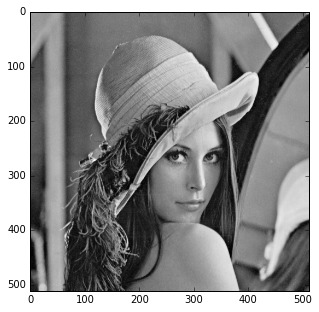

In [4]:
figure(figsize(5,5))
plt.imshow(img, 'gray');

### Computing and displaying the histogram using OpenCV

In [5]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

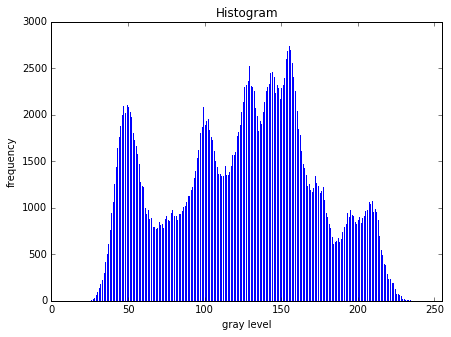

In [6]:
figure(figsize(7,5))
plt.stem(hist, markerfmt=' ')
plt.xlim([0,255])
plt.title('Histogram')
plt.xlabel('gray level')
plt.ylabel('frequency');

### Computing and displaying histogram and the cumulative histogram using NumPy

In [7]:
hist,bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()

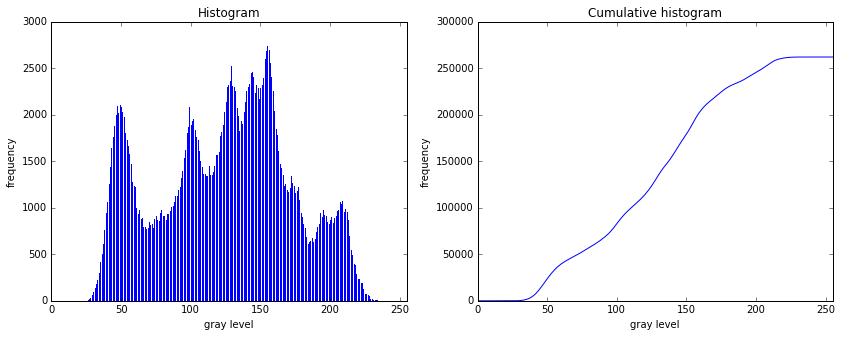

In [8]:
figure(figsize(14,5))
plt.subplot(1, 2, 1)
plt.stem(hist, markerfmt=' ')
plt.xlim([0, 255])
plt.title('Histogram')
plt.xlabel('gray level')
plt.ylabel('frequency')
plt.subplot(1, 2, 2)
plt.plot(cdf)
plt.xlim([0, 255])
plt.title('Cumulative histogram')
plt.xlabel('gray level')
plt.ylabel('frequency');

### Simple Histogram stretching

In [9]:
minValue = img.flatten().min()
maxValue = img.flatten().max()
stretched = (img - minValue) * 256 / (maxValue - minValue) + 0.5
stretched = stretched.astype(np.int)

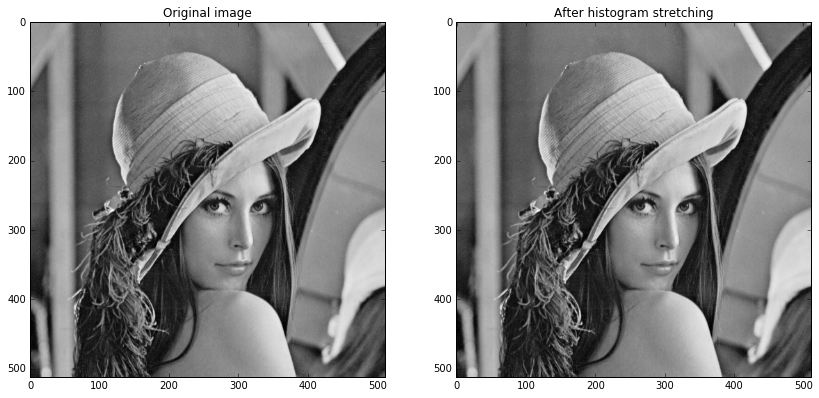

In [10]:
plt.figure(figsize(14,7))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.title('Original image');
plt.subplot(1, 2, 2), plt.imshow(stretched, 'gray')
plt.title('After histogram stretching');

In [11]:
hist,bins = np.histogram(stretched.flatten(), 256, [0,256])
cdf = hist.cumsum()

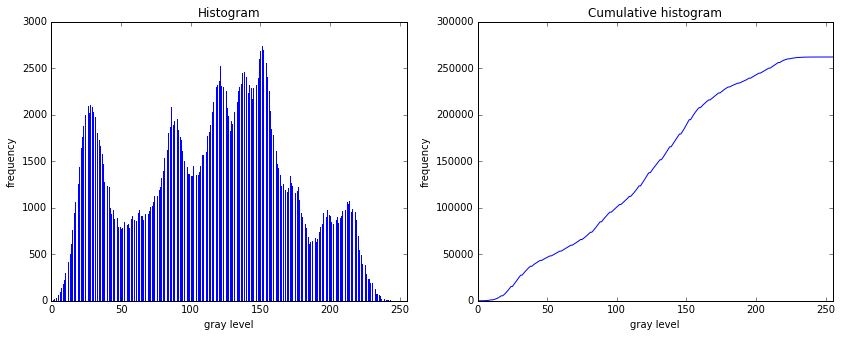

In [12]:
figure(figsize(14,5))
plt.subplot(1, 2, 1)
plt.stem(hist, markerfmt=' ')
plt.xlim([0, 255])
plt.title('Histogram')
plt.xlabel('gray level')
plt.ylabel('frequency')
plt.subplot(1, 2, 2)
plt.plot(cdf)
plt.xlim([0, 255])
plt.title('Cumulative histogram')
plt.xlabel('gray level')
plt.ylabel('frequency');


### Histogram equalization

In [13]:
equalized = cv2.equalizeHist(img)

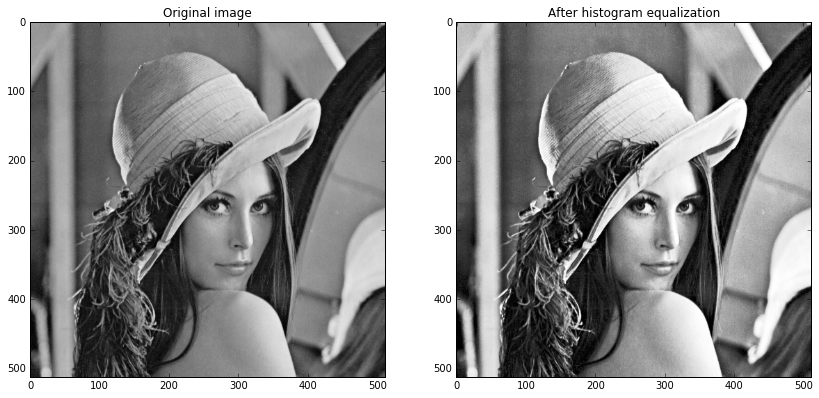

In [14]:
plt.figure(figsize(14,7))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.title('Original image');
plt.subplot(1, 2, 2), plt.imshow(equalized, 'gray')
plt.title('After histogram equalization');

### Histogram and cumulative histogram after histogram equalization

In [15]:
hist,bins = np.histogram(equalized.flatten(), 256, [0,256])
cdf = hist.cumsum()

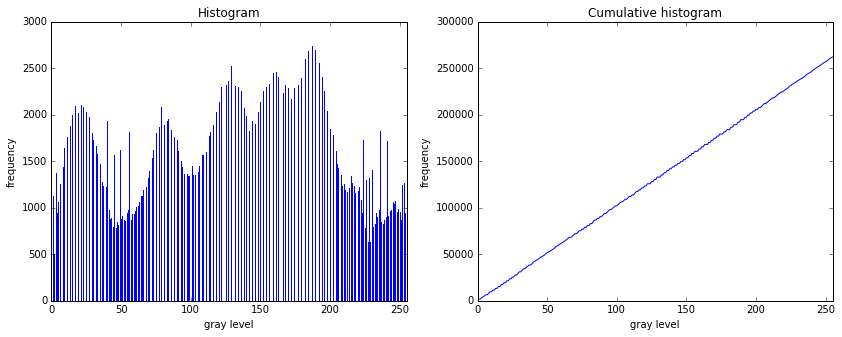

In [16]:
figure(figsize(14,5))
plt.subplot(1, 2, 1)
plt.stem(hist, markerfmt=' ')
plt.xlim([0, 255])
plt.title('Histogram')
plt.xlabel('gray level')
plt.ylabel('frequency')
plt.subplot(1, 2, 2)
plt.plot(cdf)
plt.xlim([0, 255])
plt.title('Cumulative histogram')
plt.xlabel('gray level')
plt.ylabel('frequency');